## 50_Startups Dataset

### Importing Required Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import the Dataset

In [2]:
Startups = pd.read_csv('50_Startups.csv')
Startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# Check the number of rows and columns
Startups.shape

# Dataset has 50 rows and 5 columns

(50, 5)

In [4]:
# Basic Information about the dataset
Startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
# Descriptive Statistics of the dataset
Startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### Data Pre-processing

In [6]:
# 1. Missing Value Check
Startups.isnull().sum()

# Dataset has no missing values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<AxesSubplot:ylabel='R&D Spend'>

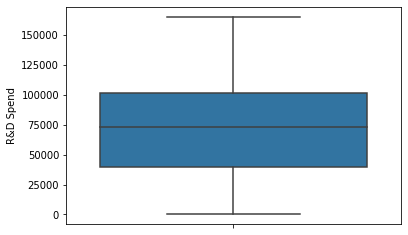

In [7]:
# 2. Check for Outliers
sns.boxplot(y = 'R&D Spend', data = Startups)

<AxesSubplot:ylabel='Administration'>

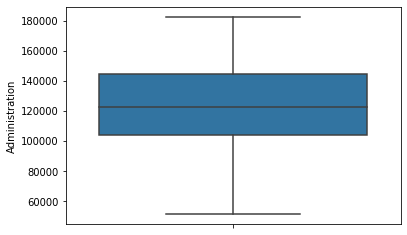

In [8]:
sns.boxplot(y = 'Administration', data = Startups)

<AxesSubplot:ylabel='Marketing Spend'>

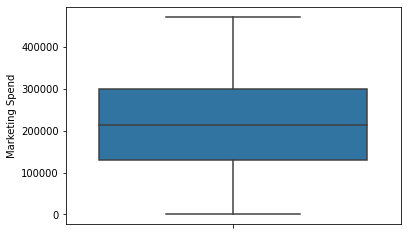

In [9]:
sns.boxplot(y = 'Marketing Spend', data = Startups)

In [10]:
# There are no outliers in the dataset

### Exploratory Data Analysis(EDA)

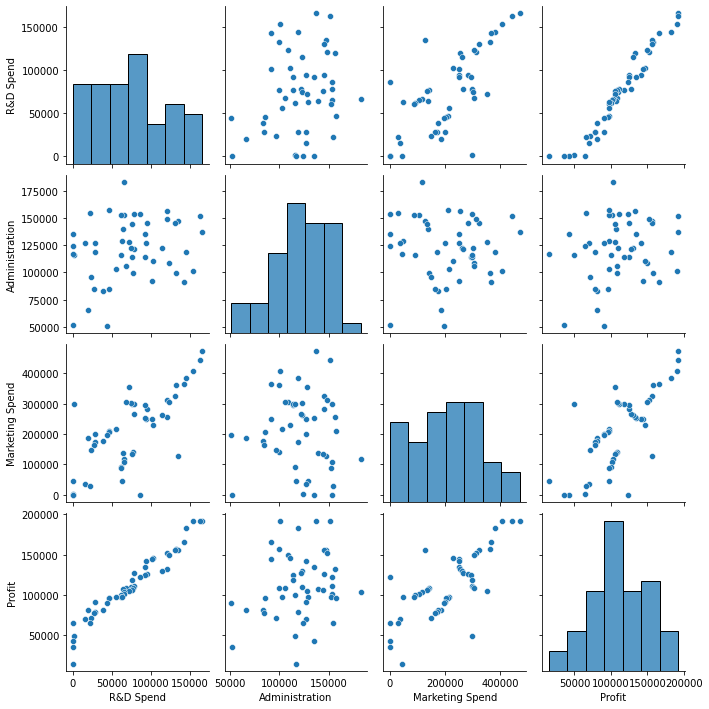

In [11]:
# Multivariate Analysis
sns.pairplot(Startups)

# it is evident that R&D Spend has perfect linear relationship with profit

<AxesSubplot:xlabel='Profit', ylabel='Density'>

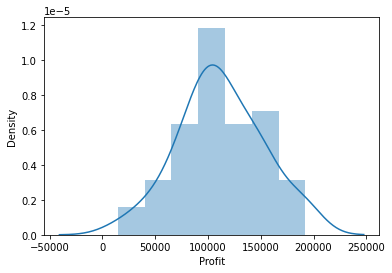

In [12]:
# Univariate  analysis
sns.distplot(Startups['Profit'])

# Data is normally distributed

In [13]:
# Correlation
Startups.corr()

 

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

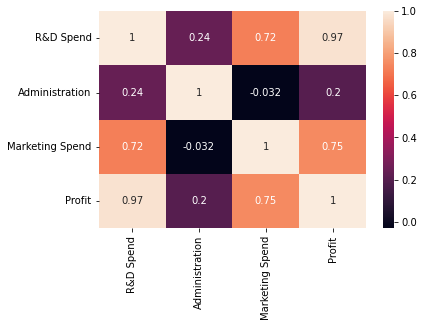

In [14]:
# Bivariate Analysis
sns.heatmap(Startups.corr(),annot = True)

# Observation: R&D Spend and Marketing Spend have strong positive correlation with Profit

### Feature Encoding

In [15]:
Startups['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [16]:
Startups = pd.get_dummies(Startups, columns=['State'], drop_first=True)

In [17]:
Startups.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


### Splitting Data Into Independent and Dependent variables

In [18]:
Startups.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [19]:
# Independent variable
x = Startups[['R&D Spend', 'Administration', 'Marketing Spend','State_Florida', 'State_New York']]

# Dependent variable
y = Startups['Profit']

In [20]:
x.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [21]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

### Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [23]:
pd.DataFrame(x_scaled).head()

,0,1,2,3,4
0,2.016411,0.560753,2.153943,-0.685994,1.393261
1,1.955860,1.082807,1.923600,-0.685994,-0.717741
2,1.754364,-0.728257,1.626528,1.457738,-0.717741
3,1.554784,-0.096365,1.422210,-0.685994,1.393261
4,1.504937,-1.079919,1.281528,1.457738,-0.717741


### Variance Inflation factor

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = x_scaled
vif = pd.DataFrame()

vif['Features'] = x.columns
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]

In [26]:
vif

,Features,Variance Inflation Factor
0,R&D Spend,2.495511
1,Administration,1.177766
2,Marketing Spend,2.416797
3,State_Florida,1.387641
4,State_New York,1.335061


In [27]:
# There is no multicollinearity in the dataset as none of the features have VIF greater than 5

### Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101 )

print('x train : ', x_train.shape)
print('x test : ', x_test.shape)
print('y train : ', y_train.shape)
print('y test : ', y_test.shape)

x train :  (40, 5)
x test :  (10, 5)
y train :  (40,)
y test :  (10,)


In [31]:
x_train.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
16,78013.11,121597.55,264346.06,0,0
24,77044.01,99281.34,140574.81,0,1
7,130298.13,145530.06,323876.68,1,0
45,1000.23,124153.04,1903.93,0,1
18,91749.16,114175.79,294919.57,1,0


In [32]:
x_test.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
37,44069.95,51283.14,197029.42,0,0
14,119943.24,156547.42,256512.92,1,0
21,78389.47,153773.43,299737.29,0,1
32,63408.86,129219.61,46085.25,0,0
22,73994.56,122782.75,303319.26,1,0


In [33]:
y_train.head()

16    126992.93
24    108552.04
7     155752.60
45     64926.08
18    124266.90
Name: Profit, dtype: float64

In [34]:
y_test.head()

37     89949.14
14    132602.65
21    111313.02
32     97427.84
22    110352.25
Name: Profit, dtype: float64

### Creating Linear Regression Model with the training data

In [36]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [37]:
print(lm.intercept_)

44799.983708052736


In [38]:
print(lm.coef_)

[7.79452152e-01 2.06811447e-02 3.39226824e-02 3.25184632e+03
 5.87912913e+02]


In [39]:
coef_df = pd.DataFrame(lm.coef_, x.columns, columns=['Coefficient'])
coef_df

,Coefficient
R&D Spend,0.779452
Administration,0.020681
Marketing Spend,0.033923
State_Florida,3251.846324
State_New York,587.912913


### Predict the Model with test data

In [40]:
y_pred = lm.predict(x_test)
y_pred

array([ 86894.76154704, 153481.03271344, 119836.8411451 ,  98459.90083029,
       118555.73979426, 189726.00155817, 114295.31485818,  61551.29942235,
        70236.8637741 ,  47600.76743229])

### Regression Model Evaluation By OLS method

In [41]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [42]:
reg_model = smf.OLS(endog = y_train, exog = x_train).fit()

In [43]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              695.6
Date:                Tue, 24 May 2022   Prob (F-statistic):                    5.64e-34
Time:                        09:41:35   Log-Likelihood:                         -432.86
No. Observations:                  40   AIC:                                      875.7
Df Residuals:                      35   BIC:                                      884.2
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.6950      0.075      9.286      0.000       0.543       0.847
Administration      0.3136      0.037      8.452      0.000       0.238       0.389
Marketing Spend     0.0834      0.026      3.232      0.003       0.031       0.136
State_Florida    8596.0614   5235.654      1.642      0.110   -2032.881    1.92e+04
State_New York   6915.6427   4729.891      1.462      0.153   -2686.546    1.65e+04
==============================================================================
Omnibus:                        1.228   Durbin-Watson:                   2.512
Prob(Omnibus):                  0.541   Jarque-Bera (JB):                1.230
Skew:                          -0.358   Prob(JB):                        0.541
Kurtosis:                       2.526   Cond. No.                     8.29e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
# Adjusted R square value is 98.9 which means that the model is a good model

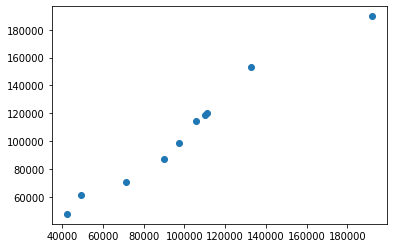

In [45]:
# Checking if the data is linear
plt.scatter(y_test, y_pred)

# Conclusion: Data is linear

<AxesSubplot:xlabel='Profit', ylabel='Density'>

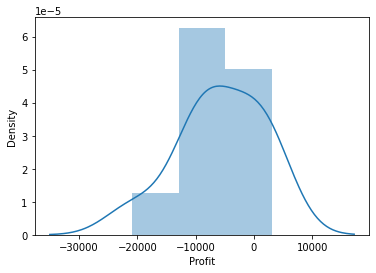

In [47]:
# Checking data for normal Distribution
sns.distplot(y_test - y_pred)

# Conclusion: Data more or less is normally distributed

### Measurements for Model Accuracy

In [48]:
from sklearn import metrics

In [49]:
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))

MAE :  7068.31793166009


In [50]:
print('MAPE : ', metrics.mean_absolute_error(y_test, y_pred)*100)

MAPE :  706831.793166009


In [51]:
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))

MSE :  83628721.14419536


In [52]:
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE :  9144.874036540654
